In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import tensorflow as tf
from tensorflow import keras as K
import matplotlib.pyplot as plt

# **Load Data**

In [3]:
train_data = pd.read_csv('//kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')


In [4]:
x_train = train_data.drop('label', axis=1).copy()
y_train = train_data['label'].copy()
x_test = test_data.copy()

# Normalization

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0


# Rehsape

In [6]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

# Label Encoding

In [7]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 10)

# Split data into train and validation set

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.10, random_state=42)

# CNN Model

In [9]:
# model = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(28,28,1)),
#         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#         tf.keras.layers.Conv2D(filters=120, kernel_size=(3,3), strides=(1,1), activation='relu'),
#         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#         tf.keras.layers.Conv2D(filters=240, kernel_size=(3,3), strides=(1,1), activation='relu'),
#         tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(512, activation='relu'),
#         tf.keras.layers.Dense(10, activation='softmax')
#     ])
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', strides=(1,1), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', strides=(1,1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', strides=(1,1), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', strides=(2,2), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            featurewise_center=0,
            samplewise_center=0,
            featurewise_std_normalization=False,
            samplewise_std_normalization=False,
            zca_whitening=False,
            zoom_range = 0.1,
            rotation_range=10,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=False,  
            vertical_flip=False)
datagen.fit(x_train)

In [11]:
history = model.fit(x=x_train, y=y_train, epochs=30, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/30
591/591 [==============================] - 3s 6ms/step - loss: 0.3364 - accuracy: 0.8902 - val_loss: 0.0786 - val_accuracy: 0.9762
Epoch 2/30
591/591 [==============================] - 3s 5ms/step - loss: 0.0994 - accuracy: 0.9701 - val_loss: 0.0513 - val_accuracy: 0.9840
Epoch 3/30
591/591 [==============================] - 3s 5ms/step - loss: 0.0771 - accuracy: 0.9775 - val_loss: 0.0475 - val_accuracy: 0.9840
Epoch 4/30
591/591 [==============================] - 3s 5ms/step - loss: 0.0594 - accuracy: 0.9823 - val_loss: 0.0328 - val_accuracy: 0.9890
Epoch 5/30
591/591 [==============================] - 3s 5ms/step - loss: 0.0513 - accuracy: 0.9844 - val_loss: 0.0419 - val_accuracy: 0.9874
Epoch 6/30
591/591 [==============================] - 3s 5ms/step - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0305 - val_accuracy: 0.9921
Epoch 7/30
591/591 [==============================] - 3s 5ms/step - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0332 - val_accuracy: 0.9910
Epoch 

# Evaluate The Model

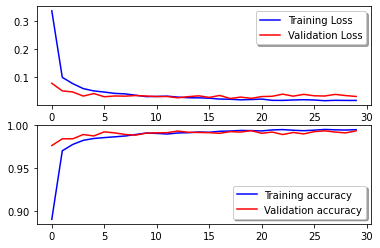

In [14]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [18]:
final = model.predict(x_test)
final = np.argmax(final,axis = 1)
final = pd.Series(final, name="Label")

219/219 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [ ]:
submission = pd.concat([pd.Series(range(1,len(x_test)+1),name = "ImageId"),final],axis = 1)

submission.to_csv("CNN_digit_recognizer.csv", index=False, header = 1)